In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
groq_api_key = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x72a44eef40b0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x72a44eef5100>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
graph_builder = StateGraph(State)

In [7]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}

In [8]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph=graph_builder.compile()

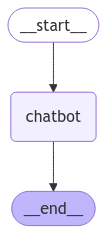

In [9]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [20]:
conversation_history = []

while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  
  conversation_history.append({"role": "user", "content": user_input})
  
  for event in graph.stream({'messages': conversation_history}):
    print(event.values())
    for value in event.values():
        print(value['messages'])
        print("Assistant:", value["messages"].content)
        conversation_history.append({"role": "assistant", "content": value["messages"].content})

dict_values([{'messages': AIMessage(content='Hi Govin, nice to meet you! 👋\n\nWhat can I do for you today? 😊  \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 15, 'total_tokens': 40, 'completion_time': 0.045454545, 'prompt_time': 0.000113939, 'queue_time': 0.021388307, 'total_time': 0.045568484}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-1befd1d3-0104-4821-8c97-1e6d8d77a7c6-0', usage_metadata={'input_tokens': 15, 'output_tokens': 25, 'total_tokens': 40})}])
content='Hi Govin, nice to meet you! 👋\n\nWhat can I do for you today? 😊  \n\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 15, 'total_tokens': 40, 'completion_time': 0.045454545, 'prompt_time': 0.000113939, 'queue_time': 0.021388307, 'total_time': 0.045568484}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason':